# Assignment 1 (INFO-F438)
Guillaume Teboul 000477905 <br> <br>
This program use the libraries: random, time and matplotlib <br> <br>
This program use the Python 3 kernel of jupyter (ipykernel) 
# Introduction
In this asignment, we will attempt to solve a protein folding problem. From a sequence of either H or P we will search for a fold on a 2d grid that will maximise the numbers of hydrogen bonds. An hydrogen bond is formed where two H are adjacent in the grid but are not neighbours in the sequence. First, we will slowly build the code capable of modelising folds and then we will analyse the performance of this code.

# Constants used in the program


In [1]:
UP = (0,1)
RIGHT = (1,0)
DOWN = (0,-1)
LEFT = (-1,0)

DIRECTIONS = [UP,RIGHT,DOWN,LEFT]

# Step 1: Generate all possible fold
The first step is to create a function that will generate all possible folds. A fold is a representation of the sequence on a 2d grid. To represent this we will use a python dictionary where the keys are the positions on the 2d grid and the value is the index in the sequence. We choose to use a dictionary to ease the process of finding if there is already a square with a symbol in it (compared to a matrix where we would need to iterate through it each time). <br> <br>
We define searchFold, a function that will print all possible folds given a sequence. sequence is the sequence, index is the index in the sequence, fold is the dictonary where we store a current fold, and currentPosition is a tuple in which we store our current position (x,y) on the 2d grid. <br> <br>
The goal is to explore the conformational space with our sequence by testing all possible directions the next symbol in the sequence could go recursively. <br> <br>
This function will, for each position UP, RIGHT, DOWN and LEFT update the currentPosition for a given symbol of index in the sequence. Then we call searchFold again for each position for index + 1. When the length of the dictionary is equal the to length of the sequence, we known we have obtain one possible conformation that we then print.

In [2]:
def realSearchFold(sequence):
    searchFold(sequence,0,{},(0,0))

def searchFold(sequence,index,fold,currentPosition):
    """Find all posible conformation for a sequence on a 2d grid"""
    if index < len(sequence):
        if currentPosition not in fold.keys():
            fold[currentPosition] = index
            if index+1 < len(sequence):
                for direction in DIRECTIONS:
                    newPosition = (currentPosition[0]+direction[0],currentPosition[1]+direction[1])
                    searchFold(sequence,index+1,fold.copy(),newPosition)
            else:
                print(fold)

In [3]:
realSearchFold("HHP")

{(0, 0): 0, (0, 1): 1, (0, 2): 2}
{(0, 0): 0, (0, 1): 1, (1, 1): 2}
{(0, 0): 0, (0, 1): 1, (-1, 1): 2}
{(0, 0): 0, (1, 0): 1, (1, 1): 2}
{(0, 0): 0, (1, 0): 1, (2, 0): 2}
{(0, 0): 0, (1, 0): 1, (1, -1): 2}
{(0, 0): 0, (0, -1): 1, (1, -1): 2}
{(0, 0): 0, (0, -1): 1, (0, -2): 2}
{(0, 0): 0, (0, -1): 1, (-1, -1): 2}
{(0, 0): 0, (-1, 0): 1, (-1, 1): 2}
{(0, 0): 0, (-1, 0): 1, (-1, -1): 2}
{(0, 0): 0, (-1, 0): 1, (-2, 0): 2}


# Step 2: Visualising a fold
Before trying to get the best fold, we need a way to visualise a fold. The folds are in the form of a dictionary which mean we need to translate it to a matrix in order to print them. <br> <br>
The first step is to remove all negative numbers: because we want to store the folds in matrix, we cannot have negative numbers.
To do this and keep the same structure we simply use the translation function. This function will find the lowest value in a position in a fold and perform a translation with that numer on the whole fold to only have only positive values. This is equivalent to performing a translation of the structure on 2d space.<br> <br>
convertFold will convert a fold in the form of a dictionary to a matrix, we need this function for both display and calculating the score. An empty space is represented by a -1, the symbol are represented by their index in the sequence.

In [4]:
def translation(fold):
    """Perform a translation on the 2d on a fold"""
    minValue = 0
    keys = list(fold.keys())
    for i in range(len(keys)):
        if keys[i][0] < minValue:
            minValue = keys[i][0]
        elif keys[i][1] < minValue:
            minValue = keys[i][1]

    newFold = {}
    for i in range(len(keys)):
        newFold[(abs(minValue) + keys[i][0],abs(minValue) + keys[i][1])] = fold[keys[i]]

    return newFold

def convertFold(sequence,fold):
    """Convert a fold in the form of a dictionary to a matrix of length sequence*sequence
    -1 represent an empty space, the symbol are represented by their index in the sequence
    """
    
    newFold = translation(fold)
    mat = []
    for i in range(len(sequence)):
        line = []
        for j in range(len(sequence)):
            line.append(-1)
        mat.append(line)
        
    for key in newFold.keys():
        mat[key[0]][key[1]] = newFold[key]
    return mat
        

    

In [5]:
testFold = {(0, 0): 0, (0, 1): 1, (-1, 1): 2, (-1, 0): 3, (-2, 0): 4, (-2, 1): 5, (-2, 2): 6,(-1,2):7}
seq = "HHHPPHPH"

print("original fold:",testFold,"\n")
print("translation:" ,translation(testFold),"\n")
print("traduction en matrix",convertFold(seq,testFold),"\n")

original fold: {(0, 0): 0, (0, 1): 1, (-1, 1): 2, (-1, 0): 3, (-2, 0): 4, (-2, 1): 5, (-2, 2): 6, (-1, 2): 7} 

translation: {(2, 2): 0, (2, 3): 1, (1, 3): 2, (1, 2): 3, (0, 2): 4, (0, 3): 5, (0, 4): 6, (1, 4): 7} 

traduction en matrix [[-1, -1, 4, 5, 6, -1, -1, -1], [-1, -1, 3, 2, 7, -1, -1, -1], [-1, -1, 0, 1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1]] 



printMat will display the fold along with the H bonds and the bonds between neighbours. We detect neighbours by substracting their index in the sequence and testing if the absolute value of this numbers is 1 (neighbours) are not (not neighbours). This function is very tedious and test multiple branching conditions to know which symbol to print.

In [6]:
def printMat(mat,sequence):
    """print a fold from the matrix containing the fold, the matrix used to display is double the size of mat
    because we also need to print the bonds.
    """
    displayMat = []
    for i in range(len(mat)):
        line2 = []
        line1 = []
        for j in range(len(mat[i])-1):
            if mat[i][j] == -1:
                line1.append(" ")
                line1.append(" ")
                
                line2.append(" ")
                line2.append(" ")
            else:
                line1.append(sequence[mat[i][j]])
                if abs(mat[i][j]-mat[i][j+1]) == 1:
                    line1.append("-")
                elif mat[i][j+1] != -1 and sequence[mat[i][j]]=="H" and sequence[mat[i][j+1]]== "H" and abs(mat[i][j]-mat[i][j+1]) != 1:
                    line1.append("*")
                else:
                    line1.append(" ")
                
                if mat[i+1][j] != -1 and abs(mat[i][j]-mat[i+1][j]) == 1:
                    line2.append("|")
                elif mat[i+1][j] != -1 and sequence[mat[i][j]]=="H" and sequence[mat[i+1][j]]== "H" and abs(mat[i+1][j]-mat[i][j]) != 1:
                    line2.append("*")
                else:
                    line2.append(" ")
                line2.append(" ")
        displayMat.append(line1)
        displayMat.append(line2)
        
    for i in range(len(displayMat)):
        for j in range(len(displayMat[i])):
            print(displayMat[i][j],end="")
        print()


In [7]:
testFold = {(0, 0): 0, (0, 1): 1, (-1, 1): 2, (-1, 0): 3, (-2, 0): 4, (-2, 1): 5, (-2, 2): 6,(-1,2):7}
seq = "HHHPPHPH"
printMat(convertFold(seq,testFold),seq)

    P-H-P     
    | * |     
    P-H*H     
      |       
    H-H       
              
              
              
              
              
              
              
              
              
              
              


# Step 3: Scoring a fold
We define for each fold a score: the number of H bonds the fold contains. To acheive this we use the function computeScore. First we convert the dictionary into a matrix using convertFold. Then we will look at both all the lines and all the columns. If a symbol is H and that its direct neighbour in the matrix is also an H and finaly that those H are not neighbours in the sequence, then we know the two H form an H bond: we increase the counter.

In [8]:
def computeScore(sequence,fold):
    """Compute a score: the numbers of H bonds, from a fold."""
    score = 0
    mat = convertFold(sequence,fold)
    
    for i in range(len(mat)-1):
        for j in range(len(mat[i])-1):
            if mat[i][j] != -1 and mat[i+1][j] != -1:
                if sequence[mat[i][j]] == 'H' and sequence[mat[i+1][j]] == 'H' and abs(mat[i][j]-mat[i+1][j]) != 1:
                    score += 1
    for i in range(len(mat[0])-1):
        for j in range(len(mat)-1):
            if mat[i][j] != -1 and mat[i][j+1] != -1:
                if sequence[mat[i][j]] == 'H' and sequence[mat[i][j+1]] == 'H' and abs(mat[i][j]-mat[i][j+1]) != 1:
                    score += 1
                
    return score

In [9]:
testFold = {(0, 0): 0, (0, -1): 1, (0, -2): 2, (1, -2): 3, (1, -1): 4, (1, 0): 5, (1, 1): 6,(0,1): 7}

print("The score for this fold is:" , computeScore("HHHPHPPH",testFold))
printMat(convertFold("HHHPHPPH",testFold),"HHHPHPPH")

The score for this fold is: 2
              
              
              
              
H-H-H*H       
| *   |       
P-H-P-P       
              
              
              
              
              
              
              
              
              


# Step 4: Finding the best fold
To find the best fold, we use the same recursion of searchFold but this time we store each fold in a list and instead of printing the fold, we return the fold of foldList with the best score. Each recursion we take the best out of the possible conformations. In the end we are left with a fold that have the highest score this sequence can acheive.

In [10]:
def realBestFold(sequence):
    return bestFold(sequence,0,{},(0,0))

def bestFold(sequence,index,fold,currentPosition):
    """return the fold with the best score"""
    if index < len(sequence):
        if currentPosition not in fold.keys():
            fold[currentPosition] = index
            
            foldList = []
            
            if index+1 < len(sequence):
                for direction in DIRECTIONS:
                    newPosition = (currentPosition[0]+direction[0],currentPosition[1]+direction[1])
                    newFold = bestFold(sequence,index+1,fold.copy(),newPosition)
                    if newFold != None:
                        foldList.append(newFold)
            else:
                return fold
            if foldList != []:
                maxFold = 0
                for i in range(1,len(foldList)):
                    if computeScore(sequence,foldList[maxFold]) < computeScore(sequence,foldList[i]):
                        maxFold = i
                return foldList[maxFold]

In [11]:
seq = "HHHPPHHPHPHH"
fold = realBestFold(seq)
print(fold)
print("The number of H bond is " ,computeScore(seq,fold))
printMat(convertFold(seq,fold),seq)

{(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, (1, 3): 4, (1, 2): 5, (1, 1): 6, (2, 1): 7, (2, 0): 8, (2, -1): 9, (1, -1): 10, (1, 0): 11}
The number of H bond is  5
                      
                      
  H-H-H-P             
  * * * |             
H-H*H-H-P             
| * |                 
P-H-P                 
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      


# Exemples
The fourth sequence of length 17 take far too much time. We will understand why in the next section.

In [12]:
seq1 = "HPHHHHPPHPPH"
seq2 = "HPPHPHP"
seq3 = "HHHHHHHHH"
seq4 = "HHHPHPPHPHPPHHHPH"

fold1 = realBestFold(seq1)
fold2 = realBestFold(seq2)
fold3 = realBestFold(seq3)

print("The score for ",seq1," is ",computeScore(seq1,fold1))
printMat(convertFold(seq1,fold1),seq1)

print("The score for ",seq2," is ",computeScore(seq2,fold2))
printMat(convertFold(seq2,fold2),seq2)

print("The score for ",seq3," is ",computeScore(seq3,fold3))
printMat(convertFold(seq3,fold3),seq3)

The score for  HPHHHHPPHPPH  is  5
                      
                      
  H-P                 
  * |                 
P-H*H-H               
| * * |               
P-H*H-H               
  | |                 
  P-P                 
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
                      
The score for  HPPHPHP  is  2
            
            
            
            
P-H*H-P     
  | * |     
  P-H-P     
            
            
            
            
            
            
            
The score for  HHHHHHHHH  is  4
H-H-H           
* * |           
H-H*H           
| * |           
H-H-H           
                
                
                
                
                

# Using random strings of size n
Using the random library, we can create random sequences of length n composed of either H or P. We want to plot the time taken (using the time library) to find the best fold with n. <br> <br>
We can cleary see that the time is exponential. This algorithm will take ridiculous amount of time for sequences longer than 15.

In [13]:
import random
import time

n = 15
timeTaken = []
length = []


for i in range(1,n):
    
    #generating random sequences
    seq = []
    for j in range(i):
        coin = random.randint(0,1)
        if coin == 0:
            seq.append("H")
        else:
            seq.append("P")
            
    #measuring the time taken to find the best fold
    start = time.time()
    fold = realBestFold(seq)
    end = time.time()
    timeTaken.append(round(end-start,2))
    length.append(i)
    print("We resolve in time " , round(end-start,2) , " sec for a random sequence of size ",i)
    

We resolve in time  0.0  sec for a random sequence of size  1
We resolve in time  0.0  sec for a random sequence of size  2
We resolve in time  0.0  sec for a random sequence of size  3
We resolve in time  0.0  sec for a random sequence of size  4
We resolve in time  0.0  sec for a random sequence of size  5
We resolve in time  0.01  sec for a random sequence of size  6
We resolve in time  0.03  sec for a random sequence of size  7
We resolve in time  0.1  sec for a random sequence of size  8
We resolve in time  0.3  sec for a random sequence of size  9
We resolve in time  0.92  sec for a random sequence of size  10
We resolve in time  2.76  sec for a random sequence of size  11
We resolve in time  8.3  sec for a random sequence of size  12
We resolve in time  25.04  sec for a random sequence of size  13
We resolve in time  77.7  sec for a random sequence of size  14


Text(0.5, 0, 'Length')

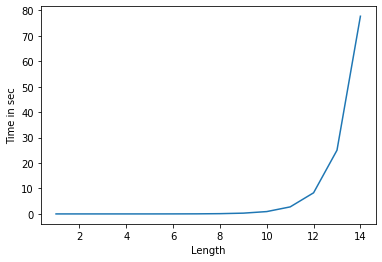

In [14]:
# from https://swcarpentry.github.io/python-novice-gapminder/09-plotting/index.html
import matplotlib.pyplot as plt
plt.plot(length,timeTaken)
plt.ylabel('Time in sec')
plt.xlabel('Length')


# Branch and Bound
We see that this algorithm takes an exponential amount of time. To have a chance to improve the performances we need to implement branch and bound techniques. <br> <br>
We need a way to detect solution that we can give up on. A first idea is that, if the end of the sequence is only formed of P and not H we can give searching the 2D conformational space early. <br> <br>
The function isGiveUpWorth will return True if the end of the sequence from an index is only composed of P. <br> <br>
With a simple condition we can implement this solution on our recursion.

In [15]:
def isGiveUpWorth(sequence,index):
    for i in range(index, len(sequence)):
        if sequence[i] == "H":
            return False
    return True

In [16]:
print(isGiveUpWorth("HHHPPHPPPPP",5))
print(isGiveUpWorth("HHHPPHPPPPP",6))

False
True


In [17]:
def realBestFold2(sequence):
    return bestFold2(sequence,0,{},(0,0))

def bestFold2(sequence,index,fold,currentPosition):
    """return the fold with the best score"""
    if index < len(sequence):
        if currentPosition not in fold.keys():
            fold[currentPosition] = index
            
            foldList = []
            
            if not isGiveUpWorth(sequence,index) and index+1 < len(sequence):
                for direction in DIRECTIONS:
                    newPosition = (currentPosition[0]+direction[0],currentPosition[1]+direction[1])
                    newFold = bestFold2(sequence,index+1,fold.copy(),newPosition)
                    if newFold != None:
                        foldList.append(newFold)
            else:
                return fold
            if foldList != []:
                maxFold = 0
                for i in range(1,len(foldList)):
                    if computeScore(sequence,foldList[maxFold]) < computeScore(sequence,foldList[i]):
                        maxFold = i
                return foldList[maxFold]

In [18]:
seq = "HHHPPHPPPPP"

fold = realBestFold2(seq)
print(fold)
printMat(convertFold(seq,fold),seq)

fold2 = realBestFold(seq)
printMat(convertFold(seq,fold2),seq)

{(0, 0): 0, (0, 1): 1, (1, 1): 2, (2, 1): 3, (2, 0): 4, (1, 0): 5, (1, -1): 6}
                    
                    
  H-H               
  * |               
P-H*H               
  | |               
  P-P               
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
  H-H               
  * |               
P-H*H               
| | |               
P P-P               
|                   
P-P-P               
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                  

In the code above, we do not have the entire conformation for the branch and bound, but the P after the last H can be in any conformation possible, the number of H bonds will be the same. It is clear that this technique will save a lot of time for sequences ending with a lot of P however the technique is useless (and even slighty worst because we iterate through the list each time) than the normal recursion for sequences that even have a single H at the end.